In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
len(train_images)

60000

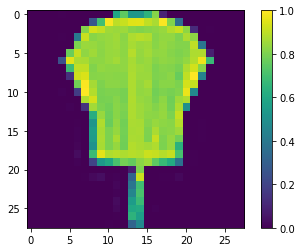

In [24]:
plt.figure()
plt.imshow(train_images[56])
plt.colorbar()
plt.grid(False)
plt.show()


In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [26]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

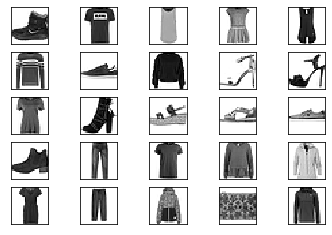

In [28]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [34]:

   # Loss function —This measures how accurate the model is
    #during training. You want to minimize this function to "steer" the model in the right direction.
    
    #Optimizer —This is how the model is updated based on the data
    #it sees and its loss function.
    
    #Metrics —Used to monitor the training and testing steps. The 
    #following example uses accuracy, the fraction of the images that are correctly classified.


In [42]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4185 - accuracy: 0.8532
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4115 - accuracy: 0.8560
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4056 - accuracy: 0.8572
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4008 - accuracy: 0.8582
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3957 - accuracy: 0.8612


In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



10000/10000 - 0s - loss: 0.4310 - accuracy: 0.8443

Test accuracy: 0.8443


In [45]:
test_loss, test_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTrain accuracy:', test_acc)



60000/60000 - 2s - loss: 0.3912 - accuracy: 0.8623

Train accuracy: 0.86235


In [46]:
# This gap between training accuracy and test accuracy represents overfitting